# **Inference RT-DETR**

In [ ]:
from ultralytics import RTDETR
import wget
import cv2
import matplotlib.pyplot as plt

# RTDETRモデルのダウンロードと初期化
try:
    model = RTDETR('rtdetr-l.pt')
except:
    wget.download('https://github.com/ultralytics/assets/releases/download/v0.0.0/rtdetr-l.pt')
    model = RTDETR('rtdetr-l.pt')

# 推論実行
image_path = 'london-buses.jpg'
results = model(image_path)

# 結果の表示と保存
for r in results:
    # 画像をプロットして表示
    plt.figure(figsize=(12, 8))
    plt.imshow(cv2.cvtColor(r.plot(), cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
    
    # 結果の保存
    cv2.imwrite('result.jpg', r.plot())

# **Test new model**


image 1/1 C:\Users\ykita\FacePhoto_instance\136-200\143-20050913-3-123028_47e95b8254c47db2ccab05c9a0234c52f5e985b982c8d624f676dd96820d4020.JPG: 640x640 1 Right_eye, 1 Left_eye, 809.0ms
Speed: 5.5ms preprocess, 809.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


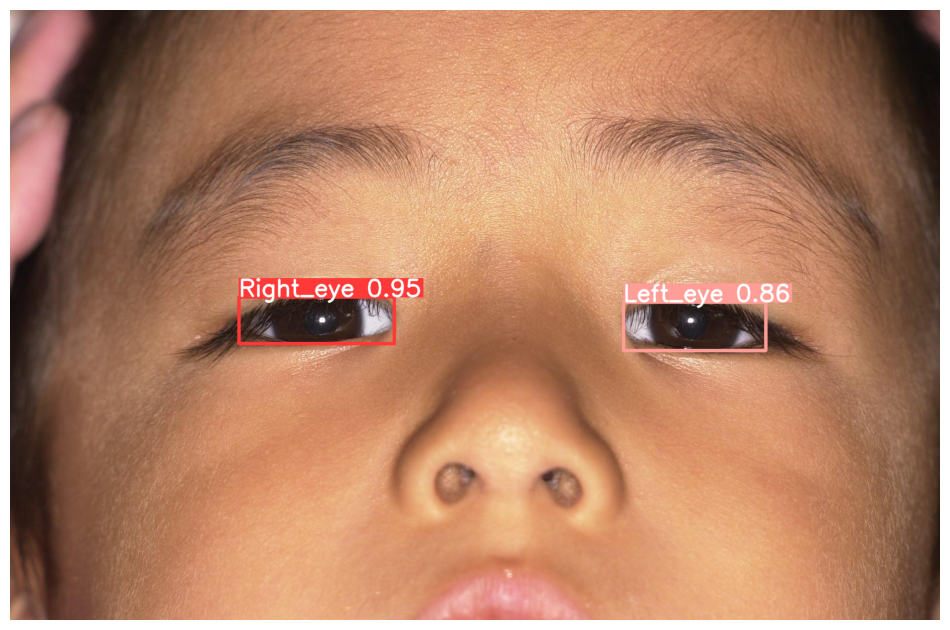

In [9]:
model = RTDETR(r"C:\Users\ykita\FacePhoto_instance\models\135best_rtdetr.pt")

# 推論実行
image_path = r'C:\Users\ykita\FacePhoto_instance\136-200\143-20050913-3-123028_47e95b8254c47db2ccab05c9a0234c52f5e985b982c8d624f676dd96820d4020.JPG'
results = model(image_path)

# 結果の表示と保存
for r in results:
    # 画像をプロットして表示
    plt.figure(figsize=(12, 8))
    plt.imshow(cv2.cvtColor(r.plot(), cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
    
    # 結果の保存
    cv2.imwrite('result.jpg', r.plot())


In [7]:
from ultralytics import RTDETR
import wget
import cv2
import matplotlib.pyplot as plt

# モデルが未定義ならロードする
try:
    model  # 変数modelが定義されているか確認
except NameError:
    print("modelが未定義のため、ロードを実行します。")
    model = RTDETR(r"C:\Users\ykita\FacePhoto_instance\models\135best_rtdetr.pt")

# 推論を実行: YOLOの推論
image_path = r'C:\Users\ykita\FacePhoto_instance\201-295\Image\293-20200311-6-095803_287b73c1d0b04ca725de2651547efd9a530231320625fb361bef3708dc3df9ee.jpg'
results = model(image_path, save=False)

for r in results:
    boxes = r.boxes  # YOLOv8の場合

    # YOLO形式出力
    for box in boxes:
        cls_id = int(box.cls[0])  # クラスID
        x_center, y_center, width, height = box.xywhn[0]

        # YOLO形式: class x_center y_center width height
        # 小数点以下6桁で出力したい場合
        print(f"{cls_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}")

    # 検出結果を画像に描画して表示
    # plt.figure(figsize=(12, 8))
    # plt.imshow(cv2.cvtColor(r.plot(), cv2.COLOR_BGR2RGB))
    # plt.axis('off')
    # plt.show()

    # 結果の保存
    #cv2.imwrite('result.jpg', r.plot())



image 1/1 C:\Users\ykita\FacePhoto_instance\201-295\Image\293-20200311-6-095803_287b73c1d0b04ca725de2651547efd9a530231320625fb361bef3708dc3df9ee.jpg: 640x640 1 Right_eye, 1 Left_eye, 771.9ms
Speed: 6.0ms preprocess, 771.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
0 0.268958 0.487141 0.170173 0.112953
1 0.687053 0.477957 0.160687 0.102739



0: 640x640 1 Right_eye, 1 Left_eye, 934.8ms
Speed: 10.4ms preprocess, 934.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


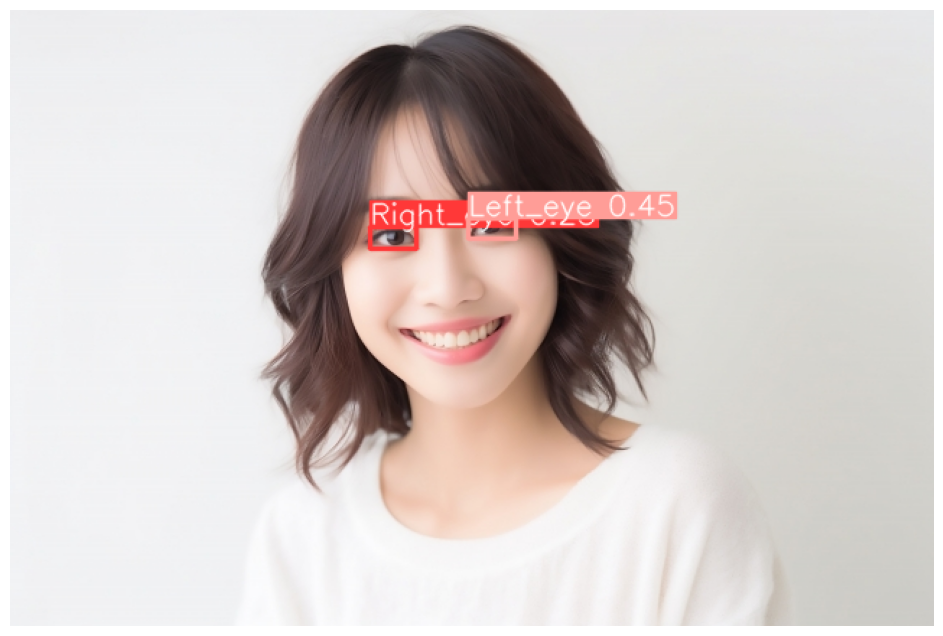

In [10]:
#Web画像の場合

from ultralytics import RTDETR
import wget
import cv2
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

# モデルが未定義ならロードする
try:
    model  # 変数modelが定義されているか確認
except NameError:
    print("modelが未定義のため、ロードを実行します。")
    model = RTDETR(r"C:\Users\ykita\FacePhoto_instance\models\135best_rtdetr.pt")

# 画像URLの指定
url = "https://365dentist.jp/wp-content/uploads/2023/06/26579868_s.jpg"

# 画像のダウンロード
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# 推論実行
results = model(img)

# 結果の表示と保存
for r in results:
    # 画像をプロットして表示
    plt.figure(figsize=(12, 8))
    plt.imshow(cv2.cvtColor(r.plot(), cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# **RT-DETR トレーニングフォルダ構成**
```
project_root/
│
├── data/
│   ├── dataset.yaml       # データセットの設定ファイル
│   │
│   ├── train/
│   │   ├── images/       # トレーニング用の画像
│   │   │   ├── img1.jpg
│   │   │   ├── img2.jpg
│   │   │   └── ...
│   │   │
│   │   └── labels/      # トレーニング用のラベル（アノテーション）
│   │       ├── img1.txt
│   │       ├── img2.txt
│   │       └── ...
│   │
│   ├── val/
│   │   ├── images/      # 検証用の画像
│   │   │   ├── img1.jpg
│   │   │   └── ...
│   │   │
│   │   └── labels/     # 検証用のラベル
│   │       ├── img1.txt
│   │       └── ...
│   │
│   └── test/           # (オプション) テスト用のデータセット
│       ├── images/
│       └── labels/
│
└── dataset.yaml        # データセット設定ファイルの内容例:
```


## **dataset.yaml**

```
# train and val data as 1) directory: path/images/, 2) file: path/images.txt, or 3) list: [path1/images/, path2/images/]
train: ./data/images/train
val: ./data/images/valid

# number of classes
nc: 2

# class names:
  0: Right_eye
  1: Left_eye

```

In [22]:
# データの前処理
# 目的: 画像ファイルとラベルファイルの対応関係を確認
# 処理内容:
# 1. ラベルディレクトリとイメージディレクトリのパスを設定
# 2. 各ディレクトリからファイル名(拡張子なし)を取得
# 3. ラベルが存在しない画像ファイルを特定
# 4. 不一致の数を表示

import os

# ラベルとイメージのディレクトリパス
labels_dir = r"C:\Users\ykita\FacePhoto_instance\data\labels"
images_dir = r"C:\Users\ykita\FacePhoto_instance\data\images"

# ラベルファイルの basename (拡張子なし) を取得
label_files = {os.path.splitext(f)[0] for f in os.listdir(labels_dir) if f.endswith('.txt')}

# 画像ファイルの basename (拡張子なし) を取得
image_files = {os.path.splitext(f)[0] for f in os.listdir(images_dir) if f.endswith('.jpg')}

# ラベルが存在しない画像ファイルを見つける
images_without_labels = image_files - label_files

# 結果を表示
print(f"ラベルが存在しない画像ファイルの数: {len(images_without_labels)}")

ラベルが存在しない画像ファイルの数: 45


In [ ]:
# ラベルが存在しない画像ファイルを削除
for img_name in images_without_labels:
    img_path = os.path.join(images_dir, img_name + '.jpg')
    try:
        os.remove(img_path)
        print(f"削除しました: {img_path}")
    except OSError as e:
        print(f"削除に失敗しました {img_path}: {e}")

print("不一致ファイルの削除が完了しました")

In [24]:
# 1. 指定されたディレクトリから画像ファイル(.jpg, .png, .tif)を取得
# 2. 画像ファイルをランダムに並び替え
# 3. train/validディレクトリを作成
# 4. データを8:2の比率で分割
# 5. 画像ファイルと対応するラベルファイル(.txt)を適切なディレクトリに移動

import os
import shutil
import random
from tqdm import tqdm

# データディレクトリのパス設定
data_img_dir = r"C:\Users\ykita\FacePhoto_instance\data\images"
data_label_dir = r"C:\Users\ykita\FacePhoto_instance\data\labels"
src_img_dir = r"C:\Users\ykita\FacePhoto_instance\data\images"
src_label_dir = r"C:\Users\ykita\FacePhoto_instance\data\labels"

# ソースディレクトリの画像ファイルを直接取得（サブディレクトリを除く）
image_files = [f for f in os.listdir(src_img_dir) 
               if f.lower().endswith(('.jpg', '.jpeg', '.png', '.tif', '.tiff')) 
               and os.path.isfile(os.path.join(src_img_dir, f))]

if not image_files:
    print("エラー: 画像ファイルが見つかりません")
else:
    print(f"見つかった画像ファイル数: {len(image_files)}")
    
    # train/validディレクトリの作成
    for split in ['train', 'valid']:
        img_split_dir = os.path.join(data_img_dir, split)
        label_split_dir = os.path.join(data_label_dir, split)
        
        os.makedirs(img_split_dir, exist_ok=True)
        os.makedirs(label_split_dir, exist_ok=True)

    # データの分割
    random.shuffle(image_files)
    train_size = int(len(image_files) * 0.8)
    train_files = image_files[:train_size]
    valid_files = image_files[train_size:]

    # ファイルの移動関数
    def move_files(files, split):
        for img_file in tqdm(files, desc=f"{split}データの移動"):
            try:
                # 画像ファイルの移動
                src_img_path = os.path.join(src_img_dir, img_file)
                dst_img_path = os.path.join(data_img_dir, split, img_file)
                
                if os.path.exists(src_img_path):
                    shutil.move(src_img_path, dst_img_path)

                # 対応するラベルファイルの移動
                label_file = os.path.splitext(img_file)[0] + '.txt'
                src_label_path = os.path.join(src_label_dir, label_file)
                dst_label_path = os.path.join(data_label_dir, split, label_file)
                
                if os.path.exists(src_label_path):
                    shutil.move(src_label_path, dst_label_path)

            except Exception as e:
                print(f"エラーが発生しました ({img_file}): {str(e)}")

    # trainとvalidそれぞれにファイルを移動
    move_files(train_files, 'train')
    move_files(valid_files, 'valid')

    print(f"訓練データ数: {len(train_files)}")
    print(f"検証データ数: {len(valid_files)}")
    print("データの分割と移動が完了しました")

見つかった画像ファイル数: 981


validデータの移動: 100%|██████████| 197/197 [00:00<00:00, 777.49it/s]

訓練データ数: 784
検証データ数: 197
データの分割と移動が完了しました


# **Train RT-DETR**

In [2]:
from ultralytics import RTDETR

# RTDETRモデルのダウンロードと初期化
try:
    model = RTDETR('rtdetr-l.pt')
except:
    wget.download('https://github.com/ultralytics/assets/releases/download/v0.0.0/rtdetr-l.pt')
    model = RTDETR('rtdetr-l.pt')

# Fine-tune
results = model.train(data=r'C:\Users\ykita\FacePhoto_instance\data\data.yaml', epochs=600, batch=8, imgsz=640)

c:\Users\ykita\FacePhoto_instance\instanceenv\lib\site-packages\ultralytics\nn\tasks.py:634: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_locati

New https://pypi.org/project/ultralytics/8.3.55 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.2 🚀 Python-3.8.6 torch-2.4.1+cpu CPU (Intel Xeon E-2276M  2.80GHz)
engine\trainer: task=detect, mode=train, model=rtdetr-l.pt, data=C:\Users\ykita\FacePhoto_instance\data\data.yaml, epochs=600, time=None, patience=50, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=N

c:\Users\ykita\FacePhoto_instance\instanceenv\lib\site-packages\ultralytics\engine\trainer.py:271: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(enabled=self.amp)
train: Scanning C:\Users\ykita\FacePhoto_instance\data\labels\train.cache... 775 images, 9 backgrounds, 0 corrupt: 100%|██████████| 784/784 [00:00<?, ?it/s]
val: Scanning C:\Users\ykita\FacePhoto_instance\data\labels\valid.cache... 194 images, 3 backgrounds, 0 corrupt: 100%|██████████| 197/197 [00:00<?, ?it/s]


Plotting labels to runs\detect\train6\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 143 weight(decay=0.0), 206 weight(decay=0.0005), 226 bias(decay=0.0)
600 epochs...

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


      1/600         0G     0.9837      1.648     0.9105         23        640: 100%|██████████| 98/98 [34:32<00:00, 21.14s/it] 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:41<00:00, 12.41s/it]

                   all        197        364      0.713      0.497      0.279      0.252



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


      2/600         0G     0.2091     0.7944    0.07904         23        640: 100%|██████████| 98/98 [33:03<00:00, 20.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:31<00:00, 11.64s/it]

                   all        197        364      0.193      0.238      0.095     0.0825



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


      3/600         0G        0.2     0.8012    0.07504         22        640: 100%|██████████| 98/98 [32:42<00:00, 20.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:45<00:00, 12.74s/it]

                   all        197        364      0.739      0.484      0.239      0.214



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


      4/600         0G     0.2046      0.787    0.07255         25        640: 100%|██████████| 98/98 [33:10<00:00, 20.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:31<00:00, 11.66s/it]

                   all        197        364      0.215        0.5      0.221      0.198



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


      5/600         0G     0.1804      0.798    0.06694         30        640: 100%|██████████| 98/98 [32:05<00:00, 19.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:39<00:00, 12.25s/it]

                   all        197        364      0.244      0.484      0.239      0.221



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


      6/600         0G     0.1711     0.7732    0.06064         24        640: 100%|██████████| 98/98 [32:34<00:00, 19.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:30<00:00, 11.59s/it]

                   all        197        364      0.721      0.497       0.25      0.231



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


      7/600         0G     0.1589      0.797    0.05718         25        640: 100%|██████████| 98/98 [32:43<00:00, 20.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:33<00:00, 11.78s/it]

                   all        197        364      0.742      0.495      0.396      0.379



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


      8/600         0G     0.1507     0.7777    0.05738         18        640: 100%|██████████| 98/98 [33:12<00:00, 20.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:30<00:00, 11.60s/it]

                   all        197        364      0.747      0.497      0.343      0.322



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


      9/600         0G     0.1723     0.7714    0.06071         26        640: 100%|██████████| 98/98 [33:17<00:00, 20.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:32<00:00, 11.75s/it]

                   all        197        364      0.155       0.25     0.0955     0.0837



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     10/600         0G     0.1459     0.7683     0.0538         26        640: 100%|██████████| 98/98 [32:30<00:00, 19.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:33<00:00, 11.81s/it]

                   all        197        364      0.236      0.276     0.0952     0.0829



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     11/600         0G     0.1391      0.775    0.05004         28        640: 100%|██████████| 98/98 [32:54<00:00, 20.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:39<00:00, 12.26s/it]

                   all        197        364      0.281      0.356      0.184      0.171



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     12/600         0G     0.1424     0.7629    0.05109         17        640: 100%|██████████| 98/98 [35:47<00:00, 21.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:36<00:00, 12.03s/it]

                   all        197        364      0.533       0.56      0.342      0.322



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     13/600         0G     0.1507     0.7759    0.05417         29        640: 100%|██████████| 98/98 [33:28<00:00, 20.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:38<00:00, 12.18s/it]

                   all        197        364      0.746      0.485      0.396      0.373



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     14/600         0G      0.137     0.7719    0.04842         29        640: 100%|██████████| 98/98 [33:45<00:00, 20.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:36<00:00, 12.04s/it]

                   all        197        364      0.727      0.503      0.352      0.332



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     15/600         0G     0.1422      0.765    0.05263         26        640: 100%|██████████| 98/98 [32:36<00:00, 19.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:34<00:00, 11.88s/it]

                   all        197        364      0.618      0.651      0.483      0.459



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     16/600         0G     0.1391      0.766    0.05177         20        640: 100%|██████████| 98/98 [32:53<00:00, 20.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:31<00:00, 11.63s/it]

                   all        197        364      0.579      0.575      0.423      0.408



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     17/600         0G     0.1423     0.7481    0.05205         21        640: 100%|██████████| 98/98 [32:20<00:00, 19.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:34<00:00, 11.87s/it]

                   all        197        364      0.841      0.893      0.836      0.786



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     18/600         0G     0.1482     0.7658    0.05312         20        640: 100%|██████████| 98/98 [32:33<00:00, 19.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:31<00:00, 11.64s/it]

                   all        197        364      0.338      0.641      0.367      0.328



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     19/600         0G     0.1294      0.761    0.04695         12        640: 100%|██████████| 98/98 [32:47<00:00, 20.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:33<00:00, 11.80s/it]

                   all        197        364      0.745      0.797      0.743      0.706



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     20/600         0G     0.1358     0.7379    0.04957         24        640: 100%|██████████| 98/98 [32:25<00:00, 19.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:31<00:00, 11.62s/it]

                   all        197        364      0.699      0.756      0.682      0.642



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     21/600         0G     0.1309     0.7639    0.04757         29        640: 100%|██████████| 98/98 [33:07<00:00, 20.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:33<00:00, 11.81s/it]

                   all        197        364      0.839      0.907      0.846      0.805



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     22/600         0G     0.1316      0.762    0.04798         23        640: 100%|██████████| 98/98 [32:56<00:00, 20.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:30<00:00, 11.60s/it]

                   all        197        364      0.576      0.498      0.351      0.334



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     23/600         0G     0.1507     0.7898    0.05576         20        640: 100%|██████████| 98/98 [33:13<00:00, 20.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [03:15<00:00, 15.02s/it]

                   all        197        364      0.319      0.403      0.236      0.196



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     24/600         0G     0.1334     0.7472    0.04943         27        640: 100%|██████████| 98/98 [34:21<00:00, 21.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:34<00:00, 11.87s/it]

                   all        197        364      0.613      0.612      0.521      0.488



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     25/600         0G     0.1404     0.7393    0.05169         23        640: 100%|██████████| 98/98 [33:08<00:00, 20.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:37<00:00, 12.13s/it]

                   all        197        364      0.704      0.739      0.626      0.581



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     26/600         0G     0.1441     0.7454    0.05238         19        640: 100%|██████████| 98/98 [33:28<00:00, 20.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:35<00:00, 11.94s/it]

                   all        197        364      0.339      0.376      0.176      0.159



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     27/600         0G     0.1632     0.7748    0.06106         21        640: 100%|██████████| 98/98 [33:07<00:00, 20.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:33<00:00, 11.83s/it]

                   all        197        364      0.492      0.507      0.343      0.316



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     28/600         0G     0.1499     0.7597    0.05849         25        640: 100%|██████████| 98/98 [33:47<00:00, 20.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:37<00:00, 12.14s/it]

                   all        197        364      0.717      0.759      0.734      0.682



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     29/600         0G     0.1697     0.7674    0.06692         24        640: 100%|██████████| 98/98 [33:14<00:00, 20.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:36<00:00, 12.02s/it]

                   all        197        364       0.67       0.71      0.685      0.645



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     30/600         0G     0.1636     0.7603    0.06234         21        640: 100%|██████████| 98/98 [33:09<00:00, 20.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:32<00:00, 11.73s/it]

                   all        197        364       0.45      0.484      0.342      0.319



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     31/600         0G     0.1665     0.7664    0.06143         14        640: 100%|██████████| 98/98 [33:11<00:00, 20.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:38<00:00, 12.16s/it]

                   all        197        364      0.659      0.714      0.559      0.521



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     32/600         0G     0.1619     0.7607    0.06225         28        640: 100%|██████████| 98/98 [33:11<00:00, 20.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:31<00:00, 11.66s/it]

                   all        197        364      0.345      0.368      0.191      0.174



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     33/600         0G     0.1601     0.7518    0.06446         24        640: 100%|██████████| 98/98 [32:54<00:00, 20.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:38<00:00, 12.18s/it]

                   all        197        364      0.641      0.666      0.564      0.527



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     34/600         0G     0.1694     0.7572    0.06407         20        640: 100%|██████████| 98/98 [33:14<00:00, 20.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:32<00:00, 11.73s/it]

                   all        197        364      0.463       0.51      0.344       0.33



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     35/600         0G     0.1557     0.7219    0.05744         24        640: 100%|██████████| 98/98 [34:23<00:00, 21.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:37<00:00, 12.13s/it]

                   all        197        364      0.588      0.631      0.469      0.441



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     36/600         0G       0.17     0.7163    0.06056         23        640: 100%|██████████| 98/98 [32:04<00:00, 19.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:26<00:00, 11.28s/it]

                   all        197        364      0.664      0.695      0.616      0.579



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     37/600         0G     0.1446     0.7086     0.0537         22        640: 100%|██████████| 98/98 [32:19<00:00, 19.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:31<00:00, 11.64s/it]

                   all        197        364       0.68       0.72      0.675      0.642



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     38/600         0G     0.1464     0.7082    0.05493         22        640: 100%|██████████| 98/98 [31:44<00:00, 19.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:26<00:00, 11.29s/it]

                   all        197        364      0.507      0.535      0.386      0.358



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     39/600         0G     0.1529     0.7122    0.05746         22        640: 100%|██████████| 98/98 [32:04<00:00, 19.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:27<00:00, 11.31s/it]

                   all        197        364      0.486       0.52      0.336      0.314



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     40/600         0G     0.1554       0.71    0.05868         21        640: 100%|██████████| 98/98 [32:05<00:00, 19.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:26<00:00, 11.25s/it]

                   all        197        364      0.741      0.691      0.662      0.622



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     41/600         0G     0.1645     0.7365     0.0615         31        640: 100%|██████████| 98/98 [32:54<00:00, 20.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:32<00:00, 11.73s/it]

                   all        197        364      0.589      0.615      0.546      0.515



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     42/600         0G     0.1527     0.6826    0.05578         38        640: 100%|██████████| 98/98 [32:21<00:00, 19.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:28<00:00, 11.43s/it]

                   all        197        364      0.703      0.751      0.666      0.628



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     43/600         0G     0.1687     0.7087    0.06353         22        640: 100%|██████████| 98/98 [32:19<00:00, 19.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:33<00:00, 11.80s/it]

                   all        197        364      0.496      0.547      0.315      0.295



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     44/600         0G     0.1484     0.7161    0.05653         24        640: 100%|██████████| 98/98 [32:25<00:00, 19.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:26<00:00, 11.24s/it]

                   all        197        364      0.784       0.83      0.762      0.723



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     45/600         0G     0.1464      0.657    0.05521         24        640: 100%|██████████| 98/98 [31:56<00:00, 19.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:37<00:00, 12.09s/it]

                   all        197        364       0.26      0.277      0.182      0.165



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     46/600         0G     0.1526      0.703    0.05834         19        640: 100%|██████████| 98/98 [32:05<00:00, 19.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:25<00:00, 11.21s/it]

                   all        197        364      0.487      0.518       0.35      0.324



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     47/600         0G     0.1507     0.7092    0.05543         23        640: 100%|██████████| 98/98 [32:11<00:00, 19.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:33<00:00, 11.80s/it]

                   all        197        364      0.611      0.649      0.563      0.526



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     48/600         0G     0.1495     0.6812    0.05516         30        640: 100%|██████████| 98/98 [33:01<00:00, 20.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:26<00:00, 11.23s/it]

                   all        197        364      0.821      0.911      0.851      0.802



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     49/600         0G      0.146     0.6925    0.05576         13        640: 100%|██████████| 98/98 [32:27<00:00, 19.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:39<00:00, 12.28s/it]

                   all        197        364      0.727      0.786      0.695      0.652



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     50/600         0G     0.1512      0.681    0.05547         21        640: 100%|██████████| 98/98 [32:32<00:00, 19.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:26<00:00, 11.26s/it]

                   all        197        364      0.564      0.572      0.383      0.344



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     51/600         0G     0.1593     0.6637    0.05873         22        640: 100%|██████████| 98/98 [32:53<00:00, 20.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:35<00:00, 11.96s/it]

                   all        197        364      0.756      0.821      0.767      0.713



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     52/600         0G      0.151     0.6949    0.05684         20        640: 100%|██████████| 98/98 [32:25<00:00, 19.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:26<00:00, 11.30s/it]

                   all        197        364      0.776      0.886      0.809      0.756



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     53/600         0G     0.1432     0.6716    0.05228         19        640: 100%|██████████| 98/98 [32:33<00:00, 19.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:28<00:00, 11.39s/it]

                   all        197        364      0.733      0.795      0.719      0.667



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     54/600         0G     0.1506     0.6417    0.05597         21        640: 100%|██████████| 98/98 [32:50<00:00, 20.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:28<00:00, 11.40s/it]

                   all        197        364      0.602      0.647      0.534      0.489



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     55/600         0G     0.1504     0.6418    0.05568         23        640: 100%|██████████| 98/98 [32:38<00:00, 19.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:27<00:00, 11.32s/it]

                   all        197        364      0.663      0.665      0.535      0.499



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     56/600         0G       0.15     0.6118    0.05524         14        640: 100%|██████████| 98/98 [32:53<00:00, 20.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:27<00:00, 11.38s/it]

                   all        197        364      0.689      0.735      0.665      0.622



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     57/600         0G     0.1456      0.648    0.05425         15        640: 100%|██████████| 98/98 [32:45<00:00, 20.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:28<00:00, 11.41s/it]

                   all        197        364      0.746      0.806      0.752      0.706



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     58/600         0G     0.1471     0.5926    0.05424         14        640: 100%|██████████| 98/98 [32:43<00:00, 20.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:27<00:00, 11.37s/it]

                   all        197        364       0.47      0.518      0.331      0.302



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     59/600         0G     0.1438     0.6492    0.05317         16        640: 100%|██████████| 98/98 [33:02<00:00, 20.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:27<00:00, 11.35s/it]

                   all        197        364      0.723      0.769      0.691      0.654



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     60/600         0G     0.1419     0.5737    0.05198         26        640: 100%|██████████| 98/98 [33:01<00:00, 20.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:27<00:00, 11.38s/it]

                   all        197        364      0.836      0.891       0.87      0.826



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     61/600         0G     0.1464     0.6076    0.05395         22        640: 100%|██████████| 98/98 [33:02<00:00, 20.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:28<00:00, 11.40s/it]

                   all        197        364      0.744      0.792      0.728      0.689



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     62/600         0G     0.1574     0.5865    0.05783         26        640: 100%|██████████| 98/98 [32:37<00:00, 19.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:27<00:00, 11.32s/it]

                   all        197        364      0.799      0.869      0.817      0.751



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     63/600         0G     0.1534     0.5788    0.05577         24        640: 100%|██████████| 98/98 [33:12<00:00, 20.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:27<00:00, 11.37s/it]

                   all        197        364      0.746      0.804      0.681      0.644



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     64/600         0G     0.1445     0.5516    0.05335         17        640: 100%|██████████| 98/98 [32:56<00:00, 20.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:29<00:00, 11.47s/it]

                   all        197        364       0.84      0.889      0.852      0.801



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     65/600         0G     0.1481     0.5868    0.05287         26        640: 100%|██████████| 98/98 [32:50<00:00, 20.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:27<00:00, 11.38s/it]

                   all        197        364      0.767       0.73      0.736      0.686



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     66/600         0G     0.1444     0.5248     0.0511         21        640: 100%|██████████| 98/98 [32:56<00:00, 20.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:34<00:00, 11.90s/it]

                   all        197        364       0.71      0.782       0.71      0.663



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     67/600         0G     0.1413     0.5105    0.05193         28        640: 100%|██████████| 98/98 [32:36<00:00, 19.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:28<00:00, 11.41s/it]

                   all        197        364      0.661      0.728      0.624      0.589



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     68/600         0G     0.1456     0.5179    0.05078         18        640: 100%|██████████| 98/98 [33:05<00:00, 20.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:30<00:00, 11.58s/it]

                   all        197        364      0.843      0.894       0.87      0.825



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     69/600         0G      0.146     0.5604    0.05513         35        640: 100%|██████████| 98/98 [32:45<00:00, 20.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:31<00:00, 11.62s/it]

                   all        197        364      0.657      0.707      0.578       0.55



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     70/600         0G     0.1383     0.4987    0.05157         13        640: 100%|██████████| 98/98 [32:28<00:00, 19.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:25<00:00, 11.23s/it]

                   all        197        364      0.879      0.887      0.874      0.828



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     71/600         0G     0.1455      0.509    0.05157         23        640: 100%|██████████| 98/98 [33:28<00:00, 20.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:34<00:00, 11.90s/it]

                   all        197        364       0.85      0.872      0.841      0.795



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     72/600         0G     0.1382     0.4877    0.05012         31        640: 100%|██████████| 98/98 [32:33<00:00, 19.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:26<00:00, 11.30s/it]

                   all        197        364      0.813      0.885      0.824      0.781



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     73/600         0G     0.1362     0.4531    0.04933         24        640: 100%|██████████| 98/98 [33:14<00:00, 20.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:36<00:00, 12.04s/it]

                   all        197        364      0.865      0.885      0.866      0.815



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     74/600         0G     0.1362     0.4683    0.04959         28        640: 100%|██████████| 98/98 [33:01<00:00, 20.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:26<00:00, 11.30s/it]

                   all        197        364      0.708      0.744      0.697      0.662



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     75/600         0G     0.1343     0.4843    0.04676         32        640: 100%|██████████| 98/98 [33:08<00:00, 20.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:29<00:00, 11.53s/it]

                   all        197        364      0.721      0.775      0.663      0.629



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     76/600         0G     0.1407     0.4791    0.05172         16        640: 100%|██████████| 98/98 [33:01<00:00, 20.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:28<00:00, 11.45s/it]

                   all        197        364      0.818      0.821      0.811      0.779



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     77/600         0G     0.1428     0.4472    0.05017         21        640: 100%|██████████| 98/98 [32:53<00:00, 20.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:29<00:00, 11.49s/it]

                   all        197        364       0.76      0.794      0.733      0.694



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     78/600         0G     0.1417     0.4366    0.05316         16        640: 100%|██████████| 98/98 [33:05<00:00, 20.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:26<00:00, 11.24s/it]

                   all        197        364      0.734      0.794      0.747      0.718



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     79/600         0G     0.1409     0.5139    0.05288         22        640: 100%|██████████| 98/98 [33:09<00:00, 20.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:27<00:00, 11.36s/it]

                   all        197        364      0.741      0.806      0.701       0.66



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     80/600         0G     0.1448     0.4967    0.05388         19        640: 100%|██████████| 98/98 [33:12<00:00, 20.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:28<00:00, 11.43s/it]

                   all        197        364      0.826      0.869      0.842      0.796



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     81/600         0G     0.1456     0.4772    0.05395         20        640: 100%|██████████| 98/98 [33:20<00:00, 20.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:32<00:00, 11.70s/it]

                   all        197        364       0.79      0.852      0.785      0.752



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     82/600         0G     0.1386     0.4479     0.0499         17        640: 100%|██████████| 98/98 [33:46<00:00, 20.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:36<00:00, 12.07s/it]

                   all        197        364      0.681      0.736      0.599      0.567



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     83/600         0G     0.1409      0.453    0.04922         28        640: 100%|██████████| 98/98 [33:19<00:00, 20.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:27<00:00, 11.35s/it]

                   all        197        364      0.851      0.896      0.889       0.84



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     84/600         0G     0.1406     0.4136    0.05103         27        640: 100%|██████████| 98/98 [32:57<00:00, 20.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:26<00:00, 11.25s/it]

                   all        197        364      0.881      0.893      0.901      0.855



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     85/600         0G     0.1429     0.4525    0.04983         14        640: 100%|██████████| 98/98 [33:29<00:00, 20.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:32<00:00, 11.72s/it]

                   all        197        364      0.771      0.844      0.798      0.762



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     86/600         0G     0.1418     0.4089    0.05406         30        640: 100%|██████████| 98/98 [32:50<00:00, 20.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:27<00:00, 11.31s/it]

                   all        197        364      0.761      0.832      0.787       0.76



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     87/600         0G     0.1445     0.4587    0.05079         21        640: 100%|██████████| 98/98 [33:28<00:00, 20.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:31<00:00, 11.69s/it]

                   all        197        364      0.881      0.924      0.926      0.888



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     88/600         0G     0.1358     0.4527     0.0482         24        640: 100%|██████████| 98/98 [32:56<00:00, 20.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:27<00:00, 11.32s/it]

                   all        197        364      0.812      0.866      0.842      0.805



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     89/600         0G     0.1346     0.4035    0.04871         12        640: 100%|██████████| 98/98 [33:39<00:00, 20.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:28<00:00, 11.44s/it]

                   all        197        364      0.812      0.811      0.783      0.748



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     90/600         0G     0.1254     0.4274    0.04473         27        640: 100%|██████████| 98/98 [33:15<00:00, 20.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:26<00:00, 11.28s/it]

                   all        197        364       0.74      0.773      0.688       0.66



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     91/600         0G     0.1382     0.4498    0.05267         26        640: 100%|██████████| 98/98 [33:12<00:00, 20.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:36<00:00, 12.03s/it]

                   all        197        364      0.793      0.814      0.786       0.75



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     92/600         0G     0.1483     0.4416    0.05478         31        640: 100%|██████████| 98/98 [33:29<00:00, 20.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:30<00:00, 11.57s/it]

                   all        197        364      0.785      0.779      0.758      0.718



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     93/600         0G     0.1507     0.4804    0.05739         28        640: 100%|██████████| 98/98 [33:25<00:00, 20.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:27<00:00, 11.38s/it]

                   all        197        364      0.634      0.594      0.526      0.484



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     94/600         0G      0.139     0.4415    0.05149         25        640: 100%|██████████| 98/98 [33:04<00:00, 20.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:26<00:00, 11.30s/it]

                   all        197        364      0.847      0.881      0.884      0.836



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     95/600         0G     0.1534     0.4883    0.05564         23        640: 100%|██████████| 98/98 [33:10<00:00, 20.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:28<00:00, 11.41s/it]

                   all        197        364       0.88      0.861      0.867      0.817



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     96/600         0G     0.1372     0.4126    0.05102         33        640: 100%|██████████| 98/98 [33:15<00:00, 20.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:35<00:00, 11.98s/it]

                   all        197        364      0.843      0.904      0.881      0.842



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     97/600         0G     0.1444     0.4676     0.0511         25        640: 100%|██████████| 98/98 [33:17<00:00, 20.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:30<00:00, 11.54s/it]

                   all        197        364      0.832      0.874      0.852      0.811



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     98/600         0G     0.1405      0.438    0.05151         17        640: 100%|██████████| 98/98 [33:22<00:00, 20.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:27<00:00, 11.38s/it]

                   all        197        364       0.84      0.846      0.841      0.794



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


     99/600         0G     0.1459     0.4534    0.05332         24        640: 100%|██████████| 98/98 [33:19<00:00, 20.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:30<00:00, 11.58s/it]

                   all        197        364      0.859      0.877      0.876      0.836



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    100/600         0G     0.1387     0.4709    0.05042         21        640: 100%|██████████| 98/98 [33:26<00:00, 20.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:27<00:00, 11.37s/it]

                   all        197        364      0.762      0.772       0.74      0.699



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    101/600         0G     0.1412     0.4094    0.05077         24        640: 100%|██████████| 98/98 [34:07<00:00, 20.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:36<00:00, 12.02s/it]

                   all        197        364      0.729      0.789      0.734      0.697



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    102/600         0G     0.1452     0.4038    0.05114         21        640: 100%|██████████| 98/98 [33:55<00:00, 20.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:30<00:00, 11.61s/it]

                   all        197        364      0.768      0.814      0.793      0.754



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    103/600         0G     0.1438      0.417    0.05213         21        640: 100%|██████████| 98/98 [33:22<00:00, 20.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:28<00:00, 11.45s/it]

                   all        197        364      0.828      0.865      0.848      0.803



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    104/600         0G     0.1326     0.3432    0.04863         36        640: 100%|██████████| 98/98 [33:42<00:00, 20.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:27<00:00, 11.35s/it]

                   all        197        364      0.818      0.859       0.86      0.818



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    105/600         0G     0.1354     0.3677    0.05064         32        640: 100%|██████████| 98/98 [33:51<00:00, 20.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:29<00:00, 11.52s/it]

                   all        197        364      0.781      0.827      0.788      0.756



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    106/600         0G     0.1264     0.4119    0.04555         20        640: 100%|██████████| 98/98 [33:58<00:00, 20.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:28<00:00, 11.40s/it]

                   all        197        364      0.811      0.806      0.791      0.747



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    107/600         0G     0.1337     0.4135    0.04998         28        640: 100%|██████████| 98/98 [33:38<00:00, 20.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:33<00:00, 11.79s/it]

                   all        197        364      0.851      0.909       0.89       0.85



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    108/600         0G     0.1348     0.4154    0.05031         33        640: 100%|██████████| 98/98 [33:51<00:00, 20.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:27<00:00, 11.31s/it]

                   all        197        364      0.827       0.85      0.834      0.786



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    109/600         0G     0.1339     0.3927    0.04859         22        640: 100%|██████████| 98/98 [33:54<00:00, 20.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:28<00:00, 11.45s/it]

                   all        197        364      0.832      0.873      0.849      0.805



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    110/600         0G     0.1323     0.3642    0.04727         31        640: 100%|██████████| 98/98 [34:02<00:00, 20.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:31<00:00, 11.64s/it]

                   all        197        364      0.779      0.842      0.792      0.754



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    111/600         0G     0.1495     0.3855      0.053         17        640: 100%|██████████| 98/98 [33:28<00:00, 20.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:31<00:00, 11.67s/it]

                   all        197        364      0.814      0.797      0.792      0.757



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    112/600         0G     0.1347     0.4106    0.04867         21        640: 100%|██████████| 98/98 [33:58<00:00, 20.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:36<00:00, 12.06s/it]

                   all        197        364      0.806      0.857      0.805       0.76



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    113/600         0G     0.1289     0.3714    0.04636         22        640: 100%|██████████| 98/98 [33:55<00:00, 20.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:32<00:00, 11.71s/it]

                   all        197        364      0.836      0.825      0.816      0.777



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    114/600         0G     0.1335     0.3625    0.04854         18        640: 100%|██████████| 98/98 [33:16<00:00, 20.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:27<00:00, 11.34s/it]

                   all        197        364       0.87      0.893      0.887      0.845



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    115/600         0G     0.1295     0.3489    0.04811         20        640: 100%|██████████| 98/98 [33:45<00:00, 20.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:28<00:00, 11.42s/it]

                   all        197        364      0.848       0.86      0.868      0.825



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    116/600         0G     0.1322     0.3827    0.04745         34        640: 100%|██████████| 98/98 [33:31<00:00, 20.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:29<00:00, 11.48s/it]

                   all        197        364      0.818      0.872      0.874      0.831



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    117/600         0G     0.1377     0.3927    0.05087         22        640: 100%|██████████| 98/98 [33:26<00:00, 20.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:29<00:00, 11.47s/it]

                   all        197        364      0.852      0.832      0.865      0.828



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    118/600         0G     0.1292     0.3495    0.04656         31        640: 100%|██████████| 98/98 [33:35<00:00, 20.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:28<00:00, 11.43s/it]

                   all        197        364      0.832      0.854      0.871      0.832



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    119/600         0G     0.1363      0.385    0.04906         29        640: 100%|██████████| 98/98 [34:41<00:00, 21.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:34<00:00, 11.92s/it]

                   all        197        364      0.813      0.787      0.812      0.775



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    120/600         0G     0.1306      0.373    0.04909         20        640: 100%|██████████| 98/98 [35:18<00:00, 21.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:34<00:00, 11.89s/it]

                   all        197        364      0.848      0.833      0.834        0.8



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    121/600         0G     0.1334     0.3223    0.04903         24        640: 100%|██████████| 98/98 [35:38<00:00, 21.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:44<00:00, 12.64s/it]

                   all        197        364      0.876      0.884       0.89      0.856



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    122/600         0G     0.1213      0.343     0.0438         26        640: 100%|██████████| 98/98 [35:02<00:00, 21.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:42<00:00, 12.52s/it]

                   all        197        364      0.831      0.875      0.875      0.837



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    123/600         0G     0.1229      0.342    0.04518         14        640: 100%|██████████| 98/98 [34:44<00:00, 21.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:35<00:00, 11.95s/it]

                   all        197        364      0.786      0.824      0.788       0.75



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    124/600         0G     0.1347     0.3692    0.04997         18        640: 100%|██████████| 98/98 [35:21<00:00, 21.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:36<00:00, 12.01s/it]

                   all        197        364      0.902      0.916      0.932      0.896



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    125/600         0G     0.1287     0.3396    0.04671         29        640: 100%|██████████| 98/98 [35:35<00:00, 21.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:39<00:00, 12.28s/it]

                   all        197        364      0.902      0.903      0.908      0.868



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    126/600         0G     0.1269     0.3595    0.04524         21        640: 100%|██████████| 98/98 [35:05<00:00, 21.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:33<00:00, 11.84s/it]

                   all        197        364      0.815      0.799      0.787      0.751



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    127/600         0G     0.1384     0.3765    0.04829         21        640: 100%|██████████| 98/98 [35:06<00:00, 21.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:36<00:00, 12.03s/it]

                   all        197        364      0.869      0.876      0.888      0.838



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    128/600         0G       0.13     0.3321    0.04558         22        640: 100%|██████████| 98/98 [35:23<00:00, 21.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:34<00:00, 11.88s/it]

                   all        197        364      0.867      0.866       0.85      0.817



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    129/600         0G     0.1299      0.354    0.04665         22        640: 100%|██████████| 98/98 [35:21<00:00, 21.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:35<00:00, 11.97s/it]

                   all        197        364      0.855      0.904      0.895      0.858



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    130/600         0G     0.1221     0.3172    0.04383         30        640: 100%|██████████| 98/98 [35:09<00:00, 21.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:40<00:00, 12.35s/it]

                   all        197        364      0.857      0.851      0.844      0.808



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    131/600         0G     0.1324     0.3441    0.04705         29        640: 100%|██████████| 98/98 [35:10<00:00, 21.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:37<00:00, 12.08s/it]

                   all        197        364      0.809      0.806      0.756      0.722



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    132/600         0G     0.1271     0.3316    0.04515         23        640: 100%|██████████| 98/98 [34:44<00:00, 21.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:34<00:00, 11.89s/it]

                   all        197        364      0.901      0.931      0.936        0.9



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    133/600         0G      0.127     0.3242    0.04622         26        640: 100%|██████████| 98/98 [35:23<00:00, 21.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:34<00:00, 11.90s/it]

                   all        197        364      0.891      0.895      0.893      0.856



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    134/600         0G      0.138     0.3421    0.05033         13        640: 100%|██████████| 98/98 [35:19<00:00, 21.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:35<00:00, 11.96s/it]

                   all        197        364       0.82      0.837      0.815       0.78



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    135/600         0G     0.1301     0.3341    0.04643         12        640: 100%|██████████| 98/98 [35:22<00:00, 21.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:37<00:00, 12.13s/it]

                   all        197        364      0.864      0.903      0.902       0.86



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    136/600         0G     0.1237      0.298    0.04547         22        640: 100%|██████████| 98/98 [35:01<00:00, 21.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:35<00:00, 11.98s/it]

                   all        197        364      0.839      0.839      0.807      0.769



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    137/600         0G     0.1242     0.3127     0.0431         33        640: 100%|██████████| 98/98 [35:17<00:00, 21.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:36<00:00, 12.01s/it]

                   all        197        364      0.882      0.921      0.905      0.865



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    138/600         0G     0.1305     0.3282    0.04711         20        640: 100%|██████████| 98/98 [35:12<00:00, 21.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:34<00:00, 11.88s/it]

                   all        197        364      0.766      0.776      0.723      0.695



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    139/600         0G     0.1352     0.3923    0.04766         16        640: 100%|██████████| 98/98 [35:27<00:00, 21.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:40<00:00, 12.32s/it]

                   all        197        364      0.745      0.773      0.686      0.656



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    140/600         0G      0.129     0.4478    0.04649         17        640: 100%|██████████| 98/98 [35:19<00:00, 21.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:40<00:00, 12.37s/it]

                   all        197        364      0.622      0.663      0.495      0.471



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    141/600         0G     0.1359     0.3632    0.04994         29        640: 100%|██████████| 98/98 [35:25<00:00, 21.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:42<00:00, 12.48s/it]

                   all        197        364      0.817      0.816      0.773      0.738



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    142/600         0G     0.1234     0.3746    0.04567         16        640: 100%|██████████| 98/98 [35:38<00:00, 21.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:34<00:00, 11.91s/it]

                   all        197        364      0.868       0.85      0.865      0.825



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    143/600         0G     0.1329     0.3233    0.04639         25        640: 100%|██████████| 98/98 [35:42<00:00, 21.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:35<00:00, 11.94s/it]

                   all        197        364      0.862       0.85       0.86      0.822



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    144/600         0G     0.1213     0.2925    0.04367         40        640: 100%|██████████| 98/98 [35:03<00:00, 21.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:34<00:00, 11.92s/it]

                   all        197        364      0.882      0.864      0.889      0.851



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    145/600         0G      0.122     0.2992    0.04254         31        640: 100%|██████████| 98/98 [35:11<00:00, 21.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:35<00:00, 11.96s/it]

                   all        197        364      0.888      0.882      0.905      0.869



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    146/600         0G     0.1234      0.275    0.04369         20        640: 100%|██████████| 98/98 [35:18<00:00, 21.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:35<00:00, 11.96s/it]

                   all        197        364      0.907      0.886      0.898      0.861



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    147/600         0G     0.1224      0.302    0.04574         26        640: 100%|██████████| 98/98 [35:18<00:00, 21.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:35<00:00, 11.94s/it]

                   all        197        364      0.817      0.846      0.846       0.81



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    148/600         0G     0.1267     0.3141    0.04406         24        640: 100%|██████████| 98/98 [35:36<00:00, 21.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:34<00:00, 11.87s/it]

                   all        197        364      0.922      0.847      0.926      0.889



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    149/600         0G     0.1162     0.3163    0.04339         21        640: 100%|██████████| 98/98 [35:16<00:00, 21.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:35<00:00, 11.93s/it]

                   all        197        364      0.858      0.895      0.905      0.868



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    150/600         0G     0.1175      0.309     0.0433         27        640: 100%|██████████| 98/98 [35:38<00:00, 21.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:42<00:00, 12.53s/it]

                   all        197        364      0.839      0.858      0.859      0.821



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    151/600         0G     0.1213     0.3069    0.04345         18        640: 100%|██████████| 98/98 [35:11<00:00, 21.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:42<00:00, 12.52s/it]

                   all        197        364       0.85      0.849      0.847      0.802



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    152/600         0G     0.1226     0.3085    0.04223         28        640: 100%|██████████| 98/98 [35:59<00:00, 22.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:36<00:00, 12.03s/it]

                   all        197        364      0.914      0.909      0.919      0.883



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    153/600         0G     0.1287     0.2741    0.04664         19        640: 100%|██████████| 98/98 [35:52<00:00, 21.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:35<00:00, 11.97s/it]

                   all        197        364      0.894      0.851      0.865      0.834



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    154/600         0G     0.1131     0.2923    0.04263         26        640: 100%|██████████| 98/98 [35:52<00:00, 21.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:35<00:00, 11.98s/it]

                   all        197        364      0.817      0.802      0.798      0.765



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    155/600         0G     0.1278     0.2869    0.04688         26        640: 100%|██████████| 98/98 [35:47<00:00, 21.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:36<00:00, 12.01s/it]

                   all        197        364      0.859      0.847      0.834       0.81



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    156/600         0G      0.116     0.2905    0.04035         19        640: 100%|██████████| 98/98 [35:34<00:00, 21.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:41<00:00, 12.45s/it]

                   all        197        364      0.848       0.84       0.84      0.807



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    157/600         0G     0.1214     0.3167    0.04287         25        640: 100%|██████████| 98/98 [35:35<00:00, 21.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:43<00:00, 12.54s/it]

                   all        197        364      0.922      0.846      0.903      0.865



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    158/600         0G     0.1219     0.2826     0.0465         23        640: 100%|██████████| 98/98 [35:24<00:00, 21.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:37<00:00, 12.14s/it]

                   all        197        364      0.904      0.913      0.911      0.877



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    159/600         0G     0.1221     0.3283    0.04586         28        640: 100%|██████████| 98/98 [36:36<00:00, 22.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:38<00:00, 12.22s/it]

                   all        197        364      0.909      0.881      0.899       0.86



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    160/600         0G     0.1218     0.2765    0.04327         21        640: 100%|██████████| 98/98 [35:51<00:00, 21.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:34<00:00, 11.90s/it]

                   all        197        364      0.893      0.882      0.889      0.852



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    161/600         0G     0.1185     0.2936    0.04352         20        640: 100%|██████████| 98/98 [35:46<00:00, 21.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:37<00:00, 12.12s/it]

                   all        197        364      0.874      0.842      0.854      0.818



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    162/600         0G     0.1201     0.2751     0.0428         25        640: 100%|██████████| 98/98 [35:44<00:00, 21.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:39<00:00, 12.25s/it]

                   all        197        364      0.861      0.885      0.874      0.847



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    163/600         0G     0.1223     0.2919     0.0453         20        640: 100%|██████████| 98/98 [35:08<00:00, 21.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:45<00:00, 12.74s/it]

                   all        197        364      0.883      0.873      0.861      0.831



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    164/600         0G     0.1176     0.2709    0.04275         38        640: 100%|██████████| 98/98 [35:28<00:00, 21.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:37<00:00, 12.13s/it]

                   all        197        364       0.83      0.819      0.796      0.766



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    165/600         0G     0.1183      0.285    0.04274         25        640: 100%|██████████| 98/98 [35:49<00:00, 21.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:36<00:00, 12.06s/it]

                   all        197        364      0.875       0.89      0.893      0.859



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    166/600         0G     0.1167      0.265    0.04194         30        640: 100%|██████████| 98/98 [35:41<00:00, 21.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:34<00:00, 11.89s/it]

                   all        197        364       0.92      0.924      0.937      0.899



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    167/600         0G     0.1144     0.2617    0.04027         20        640: 100%|██████████| 98/98 [36:01<00:00, 22.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:40<00:00, 12.33s/it]

                   all        197        364      0.862      0.888      0.882      0.845



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    168/600         0G     0.1146      0.253    0.04016         32        640: 100%|██████████| 98/98 [35:11<00:00, 21.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:35<00:00, 11.95s/it]

                   all        197        364      0.933      0.934      0.946      0.915



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    169/600         0G     0.1189     0.2863    0.04294         29        640: 100%|██████████| 98/98 [35:22<00:00, 21.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:36<00:00, 12.05s/it]

                   all        197        364      0.919      0.887      0.907      0.874



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    170/600         0G     0.1223     0.2811    0.04336         20        640: 100%|██████████| 98/98 [35:18<00:00, 21.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:36<00:00, 12.07s/it]

                   all        197        364      0.841      0.817      0.814      0.778



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    171/600         0G     0.1244     0.2859    0.04666         26        640: 100%|██████████| 98/98 [35:28<00:00, 21.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:36<00:00, 12.01s/it]

                   all        197        364      0.944      0.921      0.952      0.918



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    172/600         0G     0.1171     0.2793    0.04102         32        640: 100%|██████████| 98/98 [35:52<00:00, 21.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:35<00:00, 11.97s/it]

                   all        197        364      0.879      0.912      0.904      0.873



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    173/600         0G     0.1145     0.2726    0.04042         24        640: 100%|██████████| 98/98 [36:02<00:00, 22.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:39<00:00, 12.30s/it]

                   all        197        364      0.908      0.909      0.909      0.873



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    174/600         0G     0.1275     0.2874    0.04454         32        640: 100%|██████████| 98/98 [35:26<00:00, 21.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:44<00:00, 12.64s/it]

                   all        197        364      0.843      0.851      0.826      0.791



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    175/600         0G     0.1257     0.3053    0.04605         18        640: 100%|██████████| 98/98 [35:37<00:00, 21.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:37<00:00, 12.09s/it]

                   all        197        364      0.884      0.862       0.89       0.86



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    176/600         0G     0.1223     0.2911    0.04262         24        640: 100%|██████████| 98/98 [35:19<00:00, 21.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:37<00:00, 12.12s/it]

                   all        197        364      0.933      0.882      0.917       0.88



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    177/600         0G      0.114     0.2511    0.04167         25        640: 100%|██████████| 98/98 [35:59<00:00, 22.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:36<00:00, 12.02s/it]

                   all        197        364      0.935      0.871      0.916      0.884



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    178/600         0G     0.1172      0.275    0.04135         29        640: 100%|██████████| 98/98 [35:54<00:00, 21.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:35<00:00, 11.99s/it]

                   all        197        364      0.934       0.93      0.947      0.914



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    179/600         0G     0.1061     0.2436    0.03885         23        640: 100%|██████████| 98/98 [35:38<00:00, 21.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:38<00:00, 12.18s/it]

                   all        197        364      0.922      0.915      0.919      0.886



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    180/600         0G      0.114     0.2617    0.04254         19        640: 100%|██████████| 98/98 [35:22<00:00, 21.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:39<00:00, 12.24s/it]

                   all        197        364      0.841      0.835      0.814      0.783



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    181/600         0G     0.1091     0.2477    0.03993         20        640: 100%|██████████| 98/98 [35:34<00:00, 21.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:39<00:00, 12.26s/it]

                   all        197        364      0.891      0.875      0.872      0.843



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    182/600         0G     0.1128     0.2621     0.0402         29        640: 100%|██████████| 98/98 [34:53<00:00, 21.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:33<00:00, 11.85s/it]

                   all        197        364      0.894      0.879      0.903      0.874



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    183/600         0G     0.1112     0.2633    0.03889         18        640: 100%|██████████| 98/98 [35:34<00:00, 21.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:35<00:00, 11.93s/it]

                   all        197        364      0.863      0.905       0.88      0.847



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    184/600         0G      0.106     0.2566    0.03758         24        640: 100%|██████████| 98/98 [35:50<00:00, 21.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:35<00:00, 11.95s/it]

                   all        197        364      0.905      0.914       0.91      0.878



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    185/600         0G     0.1073     0.2466    0.03894         26        640: 100%|██████████| 98/98 [35:11<00:00, 21.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:43<00:00, 12.60s/it]

                   all        197        364       0.92      0.865      0.894      0.862



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    186/600         0G     0.1077     0.2504    0.03841         25        640: 100%|██████████| 98/98 [35:06<00:00, 21.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:36<00:00, 12.03s/it]

                   all        197        364      0.888       0.88      0.878      0.849



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    187/600         0G     0.1088     0.2831    0.04012         24        640: 100%|██████████| 98/98 [35:12<00:00, 21.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:36<00:00, 12.07s/it]

                   all        197        364      0.843      0.873      0.842      0.813



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    188/600         0G      0.119     0.2765    0.04268         25        640: 100%|██████████| 98/98 [35:24<00:00, 21.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:33<00:00, 11.84s/it]

                   all        197        364      0.943      0.898       0.93      0.894



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    189/600         0G     0.1072     0.2488    0.03932         18        640: 100%|██████████| 98/98 [34:57<00:00, 21.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:40<00:00, 12.37s/it]

                   all        197        364      0.939      0.902      0.926      0.892



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    190/600         0G     0.1136     0.2548    0.04024         13        640: 100%|██████████| 98/98 [35:08<00:00, 21.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:44<00:00, 12.68s/it]

                   all        197        364       0.87      0.856      0.864      0.836



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    191/600         0G     0.1073      0.241    0.03775         22        640: 100%|██████████| 98/98 [35:33<00:00, 21.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:41<00:00, 12.43s/it]

                   all        197        364      0.938      0.881      0.917      0.888



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    192/600         0G     0.1083     0.2707       0.04         24        640: 100%|██████████| 98/98 [35:22<00:00, 21.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:34<00:00, 11.85s/it]

                   all        197        364      0.902      0.863      0.889      0.859



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    193/600         0G     0.1129     0.2883    0.04134         22        640: 100%|██████████| 98/98 [35:21<00:00, 21.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:36<00:00, 12.04s/it]

                   all        197        364      0.867      0.887      0.884      0.849



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    194/600         0G     0.1162     0.2743    0.04157         24        640: 100%|██████████| 98/98 [35:26<00:00, 21.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:38<00:00, 12.22s/it]

                   all        197        364      0.884      0.838      0.839      0.813



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    195/600         0G     0.1099     0.2778    0.03924         20        640: 100%|██████████| 98/98 [35:39<00:00, 21.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:44<00:00, 12.66s/it]

                   all        197        364      0.898      0.932      0.933      0.905



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    196/600         0G     0.1101     0.2496    0.03948         18        640: 100%|██████████| 98/98 [35:21<00:00, 21.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:42<00:00, 12.49s/it]

                   all        197        364      0.943      0.923      0.948      0.917



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    197/600         0G     0.1101     0.2631    0.04119         24        640: 100%|██████████| 98/98 [36:03<00:00, 22.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:38<00:00, 12.22s/it]

                   all        197        364      0.893      0.898      0.902      0.875



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    198/600         0G     0.1131     0.2713    0.04131         24        640: 100%|██████████| 98/98 [35:23<00:00, 21.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:37<00:00, 12.09s/it]

                   all        197        364       0.89      0.909      0.916      0.893



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    199/600         0G     0.1163     0.2611    0.04281         14        640: 100%|██████████| 98/98 [35:20<00:00, 21.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:35<00:00, 11.98s/it]

                   all        197        364      0.892      0.922      0.911      0.882



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    200/600         0G     0.1209     0.2553    0.04534         21        640: 100%|██████████| 98/98 [35:38<00:00, 21.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:40<00:00, 12.34s/it]

                   all        197        364       0.93      0.889      0.916      0.885



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    201/600         0G     0.1141     0.2399    0.04128         27        640: 100%|██████████| 98/98 [35:18<00:00, 21.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:46<00:00, 12.77s/it]

                   all        197        364        0.9      0.865      0.879      0.851



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    202/600         0G     0.1132     0.2398    0.04072         21        640: 100%|██████████| 98/98 [35:26<00:00, 21.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:40<00:00, 12.37s/it]

                   all        197        364      0.907      0.902        0.9      0.869



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    203/600         0G     0.1092     0.2389    0.03863         25        640: 100%|██████████| 98/98 [35:50<00:00, 21.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:35<00:00, 11.98s/it]

                   all        197        364       0.89      0.876      0.874      0.845



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    204/600         0G     0.1041     0.2392    0.03782         24        640: 100%|██████████| 98/98 [36:01<00:00, 22.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:35<00:00, 11.97s/it]

                   all        197        364      0.928      0.922      0.922      0.892



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    205/600         0G     0.1069     0.2299    0.03829         22        640: 100%|██████████| 98/98 [35:54<00:00, 21.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:39<00:00, 12.25s/it]

                   all        197        364      0.906      0.928      0.923       0.89



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    206/600         0G     0.1075     0.2498    0.04122         18        640: 100%|██████████| 98/98 [35:42<00:00, 21.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:39<00:00, 12.27s/it]

                   all        197        364      0.925      0.915      0.927      0.897



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    207/600         0G     0.1119     0.2528    0.04057         28        640: 100%|██████████| 98/98 [35:33<00:00, 21.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:46<00:00, 12.81s/it]

                   all        197        364      0.922      0.898      0.927      0.891



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    208/600         0G     0.1045     0.2297     0.0378         19        640: 100%|██████████| 98/98 [35:35<00:00, 21.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:38<00:00, 12.18s/it]

                   all        197        364      0.936      0.923      0.933      0.901



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    209/600         0G      0.108     0.2389    0.04082         19        640: 100%|██████████| 98/98 [35:17<00:00, 21.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:38<00:00, 12.18s/it]

                   all        197        364      0.925      0.933      0.942       0.91



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    210/600         0G     0.1096      0.256    0.03846         34        640: 100%|██████████| 98/98 [35:40<00:00, 21.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:34<00:00, 11.86s/it]

                   all        197        364      0.894      0.913      0.913      0.879



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    211/600         0G     0.1134     0.2399    0.04071         26        640: 100%|██████████| 98/98 [36:01<00:00, 22.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:38<00:00, 12.18s/it]

                   all        197        364        0.9      0.889      0.905      0.872



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    212/600         0G     0.1048     0.2239    0.03805         23        640: 100%|██████████| 98/98 [35:34<00:00, 21.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:39<00:00, 12.30s/it]

                   all        197        364      0.904      0.922      0.921      0.892



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    213/600         0G     0.1064     0.2285    0.03894         26        640: 100%|██████████| 98/98 [35:25<00:00, 21.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:45<00:00, 12.70s/it]

                   all        197        364      0.894      0.914      0.901      0.867



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    214/600         0G     0.1048     0.2308    0.03788         27        640: 100%|██████████| 98/98 [35:24<00:00, 21.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:38<00:00, 12.17s/it]

                   all        197        364      0.926      0.934      0.936      0.907



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    215/600         0G     0.1073     0.2239    0.03835         33        640: 100%|██████████| 98/98 [35:08<00:00, 21.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:36<00:00, 12.03s/it]

                   all        197        364      0.931      0.892      0.916      0.888



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    216/600         0G     0.1125      0.254    0.04007         26        640: 100%|██████████| 98/98 [35:51<00:00, 21.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:34<00:00, 11.88s/it]

                   all        197        364      0.894      0.824      0.848      0.818



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    217/600         0G     0.1174     0.2465    0.04031         25        640: 100%|██████████| 98/98 [35:23<00:00, 21.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:42<00:00, 12.52s/it]

                   all        197        364      0.894      0.906      0.893      0.864



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    218/600         0G     0.1069     0.2403    0.03887         27        640: 100%|██████████| 98/98 [35:10<00:00, 21.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:44<00:00, 12.63s/it]

                   all        197        364      0.904      0.889      0.909       0.88



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    219/600         0G     0.1103     0.2226    0.03958         22        640: 100%|██████████| 98/98 [35:16<00:00, 21.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:40<00:00, 12.33s/it]

                   all        197        364      0.897      0.914        0.9      0.872



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    220/600         0G     0.1025     0.2445    0.03727         18        640: 100%|██████████| 98/98 [34:54<00:00, 21.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:35<00:00, 11.99s/it]

                   all        197        364      0.932      0.879      0.907      0.874



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


    221/600         0G     0.1023     0.2131    0.03713         22        640: 100%|██████████| 98/98 [35:33<00:00, 21.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:34<00:00, 11.91s/it]

                   all        197        364       0.89      0.869      0.865      0.841
Stopping training early as no improvement observed in last 50 epochs. Best results observed at epoch 171, best model saved as best.pt.
To update EarlyStopping(patience=50) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



221 epochs completed in 135.581 hours.
Optimizer stripped from runs\detect\train6\weights\last.pt, 66.2MB
Optimizer stripped from runs\detect\train6\weights\best.pt, 66.2MB

Validating runs\detect\train6\weights\best.pt...
Ultralytics YOLOv8.1.2 🚀 Python-3.8.6 torch-2.4.1+cpu CPU (Intel Xeon E-2276M  2.80GHz)
rt-detr-l summary: 498 layers, 31987850 parameters, 0 gradients, 103.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:21<00:00, 10.89s/it]


                   all        197        364      0.943      0.921      0.952      0.918
             Right_eye        197        193      0.941      0.913      0.947      0.912
              Left_eye        197        171      0.946       0.93      0.956      0.923
Speed: 5.3ms preprocess, 649.7ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs\detect\train6
